<a href="https://colab.research.google.com/github/jackbrancati/Fantasy-Football-Data-Visualization/blob/main/FF_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)

#####################################################################################
#   Seaborn and Matplotlib are practically the same thing
#   Seaborn is newer
#   But Matplotlib has more customization
#   You will see the following code instances where I use Seaborn for one vizualization
#   and then use Matplotlib for the same, or another extremely similar, visualization
#####################################################################################


In [3]:
#2022 Stats
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:, 1:]
#original dataset has a 'rank' column at index 0. we remove it with .iloc[:, 1:]

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [13]:
rb_df = df.loc[df['Pos']=='RB']
rb_df['Usage']=rb_df['Tgt']+rb_df['RushingAtt']
rb_df['Usage/G']=rb_df['Usage']/rb_df['G']
rb_df['FantasyPoints/G']=rb_df['FantasyPoints']/rb_df['G']
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G,FantasyPoints/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000,18.925000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588,21.923529
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176,16.552941
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500,17.750000
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941,13.288235
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000,15.550000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529,13.988235
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706,12.747059


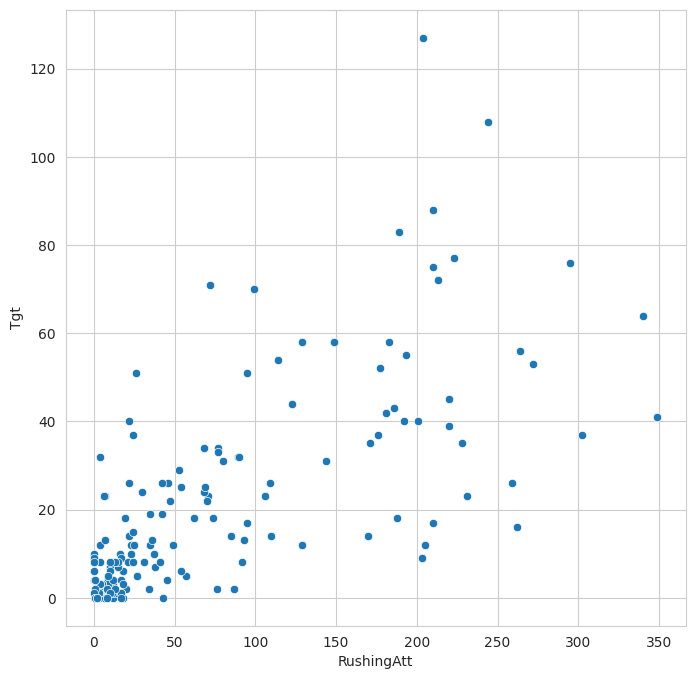

In [25]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.scatterplot(x=rb_df['RushingAtt'],y=rb_df['Tgt']);

Text(0.5, 1.0, 'Rushing Attempts vs Tgt - 2022 Season')

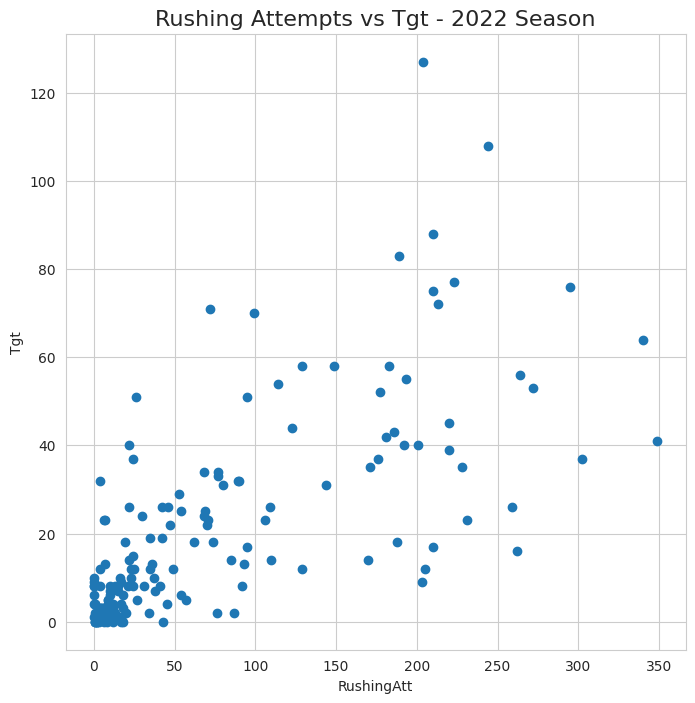

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'],rb_df['Tgt'])
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs Tgt - 2022 Season', fontsize=16)


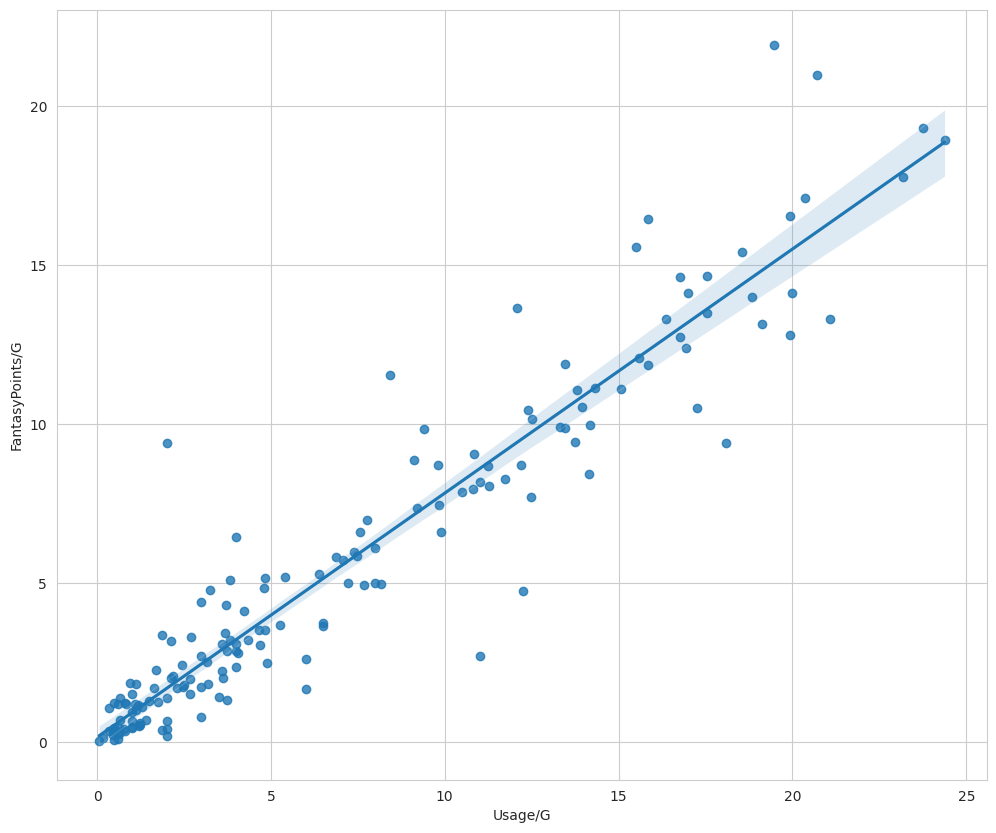

In [29]:
plt.figure(figsize=(12,10))

sns.regplot(x=rb_df['Usage/G'],y=rb_df['FantasyPoints/G']);

<Axes: xlabel='RushingAtt', ylabel='Density'>

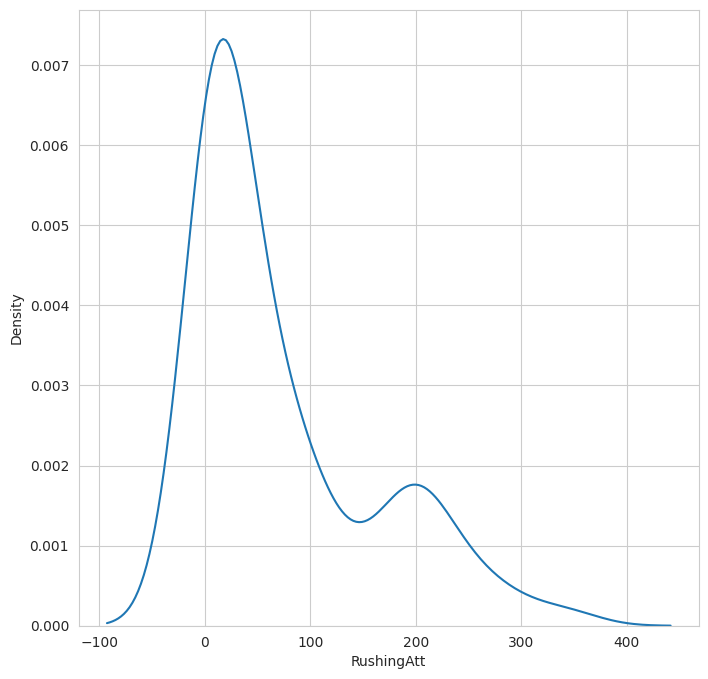

In [30]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['RushingAtt'])


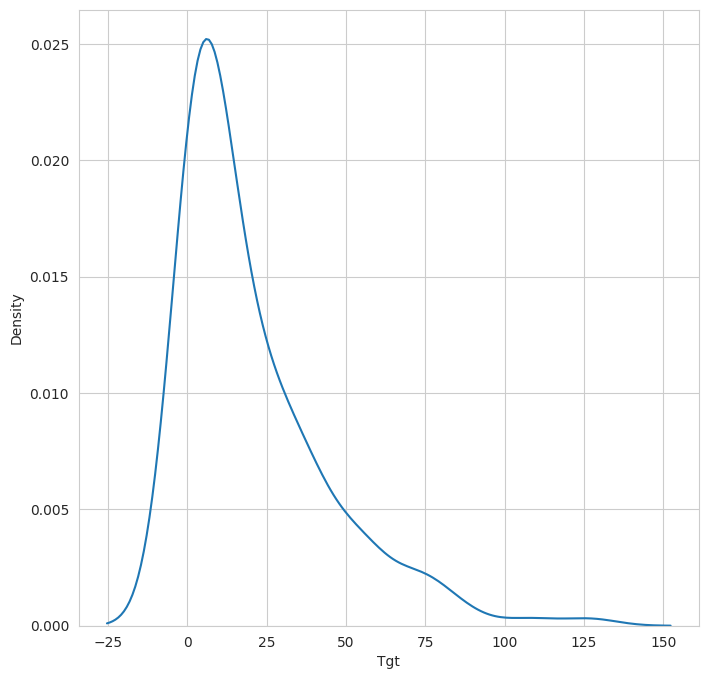

In [31]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['Tgt']);

<Figure size 800x800 with 0 Axes>

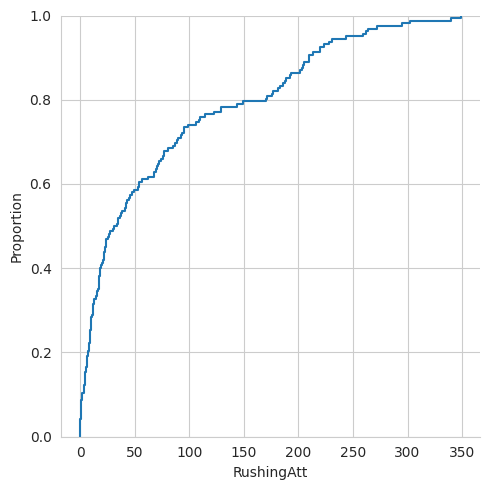

In [36]:
plt.figure(figsize=(8,8));
sns.displot(rb_df['RushingAtt'],kind='ecdf');

<Figure size 800x800 with 0 Axes>

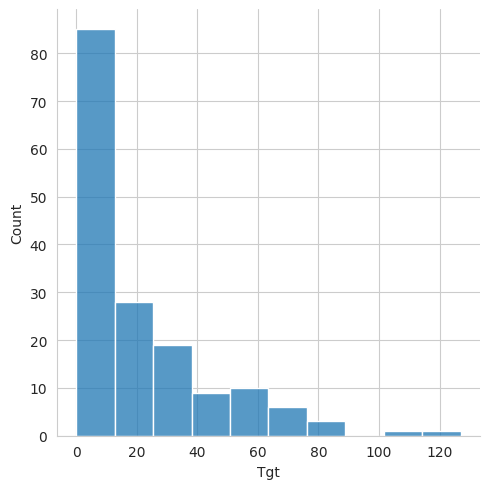

In [40]:
plt.figure(figsize=(8,8));
sns.displot(rb_df['Tgt'],bins=10)

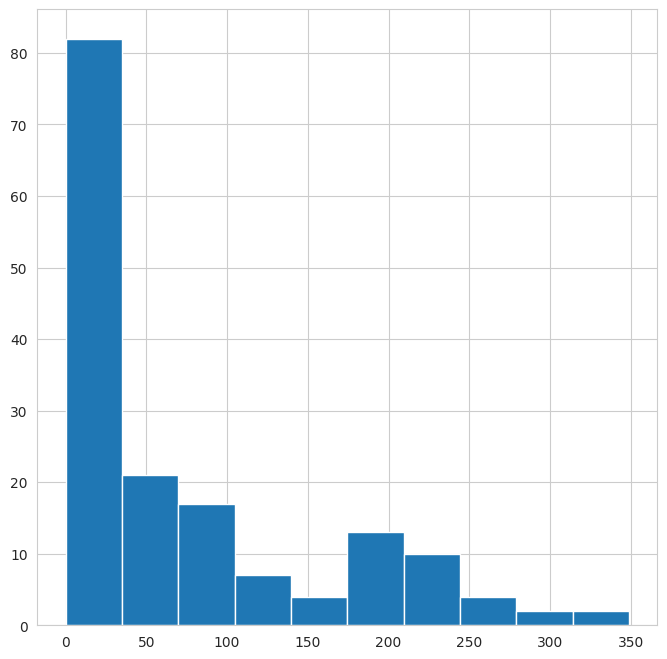

In [42]:
plt.figure(figsize=(8,8));
plt.hist(rb_df['RushingAtt']);

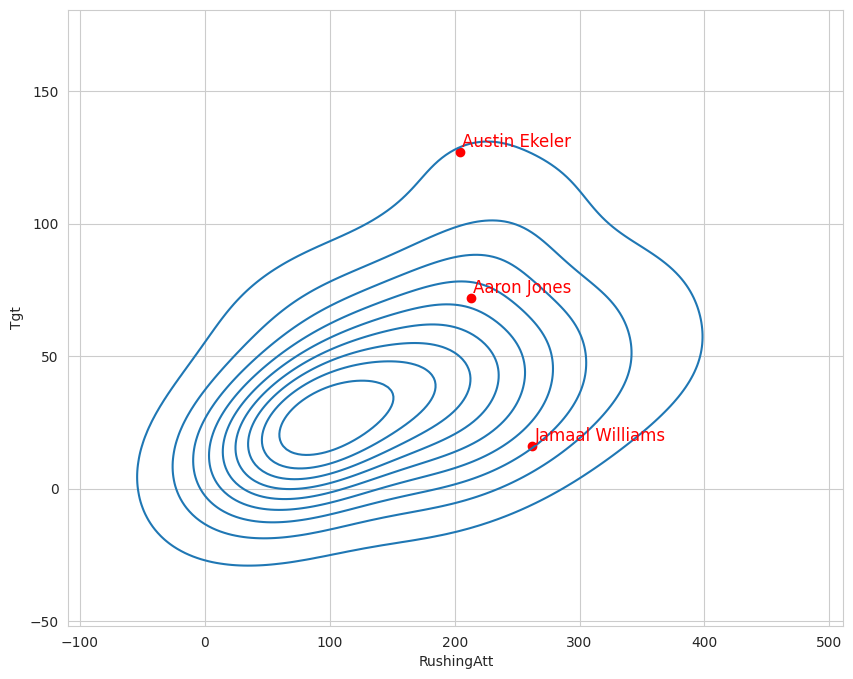

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
notable_players = [
    'Austin Ekeler', 'Aaron Jones', 'Jamaal Williams'
]

rb_df_filtered = rb_df.loc[rb_df['RushingAtt']>50]

for player_name in notable_players:
  player = rb_df_filtered.loc[rb_df_filtered['Player']==player_name]
  if not player.empty:
    targets=player['Tgt']
    rushes=player['RushingAtt']

  ax.annotate(player_name,xy=(rushes+2,targets+2),color='red',fontsize=12)
  ax.scatter(rushes,targets,color='red')

sns.kdeplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'],ax=ax,bw_method=0.7);

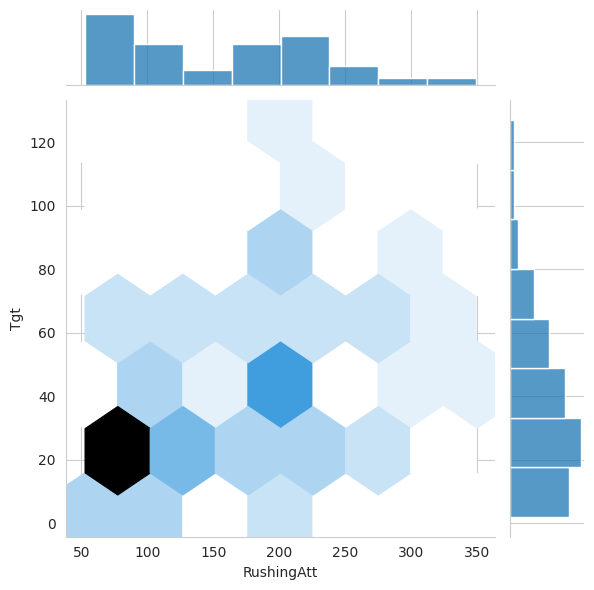

In [50]:
sns.jointplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'],kind='hex',dropna=True);

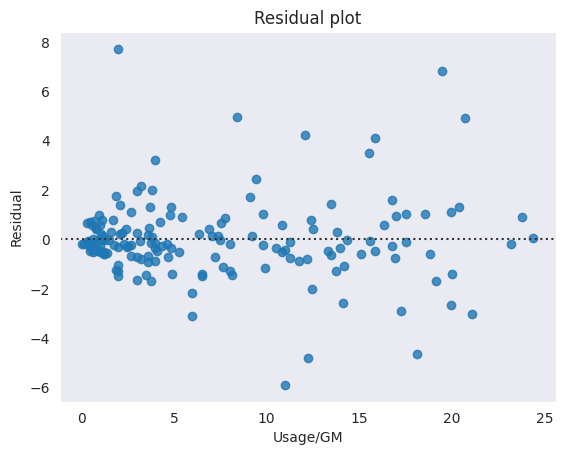

In [51]:
sns.set_style('dark')

sns.residplot(x=rb_df['Usage/G'],y=rb_df['FantasyPoints/G'])
plt.title('Residual plot')
plt.xlabel('Usage/GM') #set x label in matplotlib
plt.ylabel('Residual') #and set y label
plt.show() #show our plot

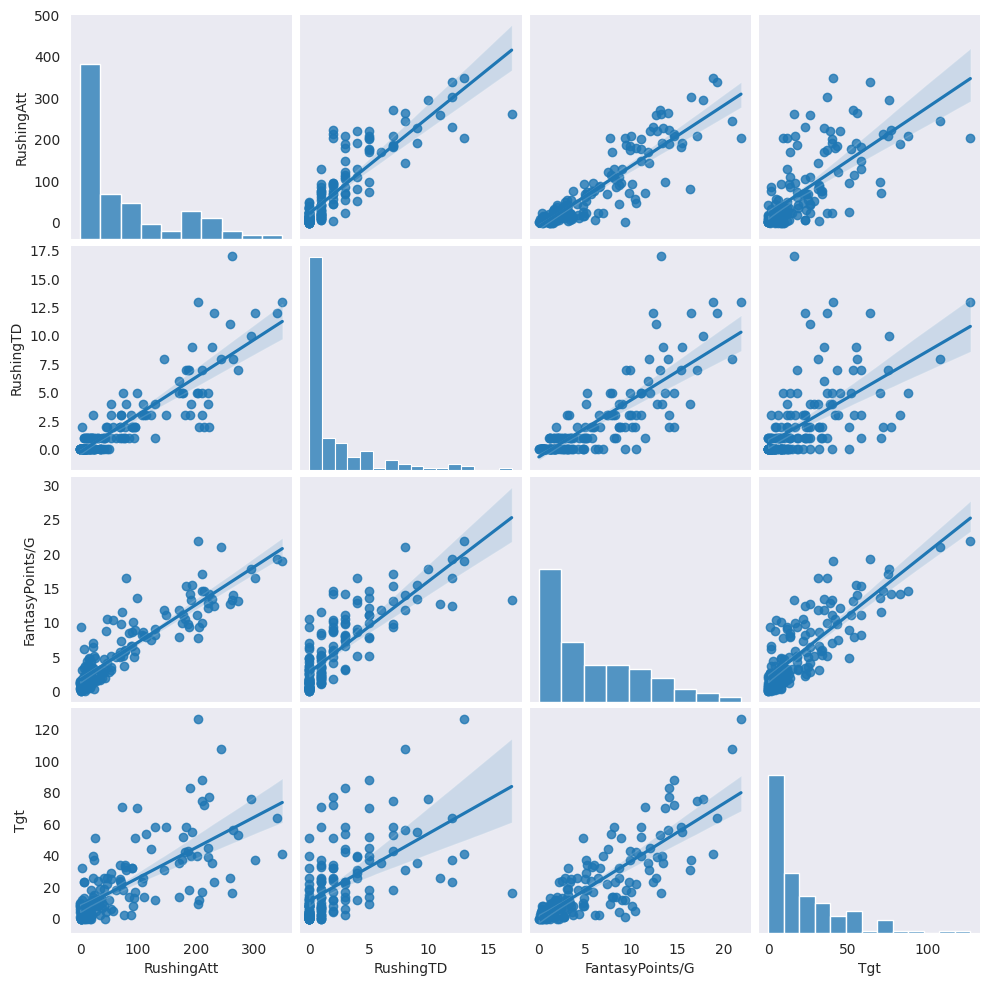

In [54]:
rb_df_copy=rb_df[['RushingAtt','RushingTD','FantasyPoints/G','Tgt']]

sns.pairplot(rb_df_copy,kind='reg')

In [74]:
weekly_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202022/weekly_df.csv")


weekly_df.head()

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,17,1,27,18,9,1.050854,0,2,-1,0,0,-1.437167,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,2,0,34,18,8,2.428707,0,3,-2,0,0,-7.115407,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,20,0,42,31,15,1.076749,0,1,-1,0,0,0.000000,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,12,0,52,39,23,9.511334,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,0,0,52,35,17,12.989590,1,3,-3,0,0,-3.336036,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


In [76]:
allen=weekly_df.loc[weekly_df['Player']=='Josh Allen']
mahomes=weekly_df.loc[weekly_df['Player']=='Patrick Mahomes']
wilson=weekly_df.loc[weekly_df['Player']=='Russell Wilson']


Text(0.5, 1.0, 'Wilson vs Mahomes vs Allen - week by week Fantasy Performace')

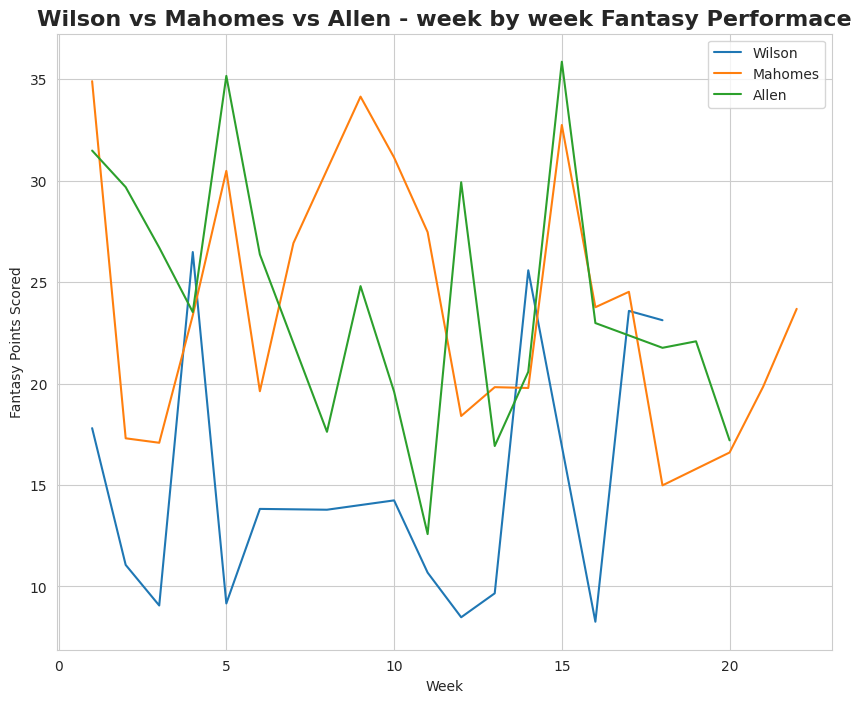

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.plot(wilson['Week'],wilson['StandardFantasyPoints']);
plt.plot(mahomes['Week'],mahomes['StandardFantasyPoints']);
plt.plot(allen['Week'],allen['StandardFantasyPoints']);
plt.legend(['Wilson','Mahomes','Allen'])
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs Mahomes vs Allen - week by week Fantasy Performace',fontsize=16,fontweight='bold')

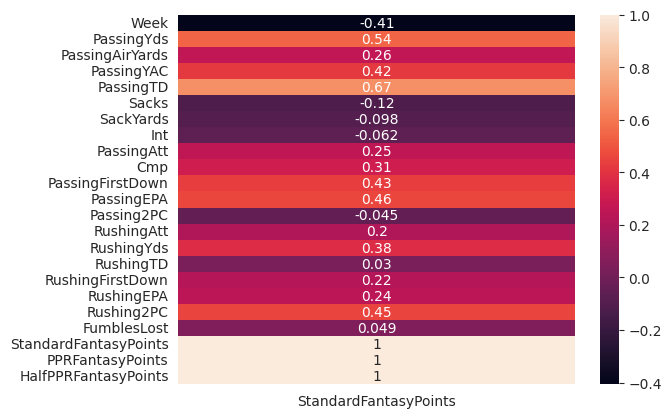

In [100]:
#allen.corr()
#Above function worked for teacher but not for me :/

corr = allen.corr(numeric_only=True)[['StandardFantasyPoints']].dropna()

sns.heatmap(corr,annot=True);


In [107]:
df_copy=df.copy()
df_copy['Usage/G'] = (df_copy['PassingAtt']+df_copy['Tgt']+df_copy['RushingAtt'])/ df_copy['G']
df_copy['FantasyPoints/G']=df_copy['FantasyPoints'] / df_copy['G']
df_copy.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage/G,FantasyPoints/G
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4,41.764706,24.552941
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,20.764706,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,24.500000,18.925000
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7,11.176471,21.688235


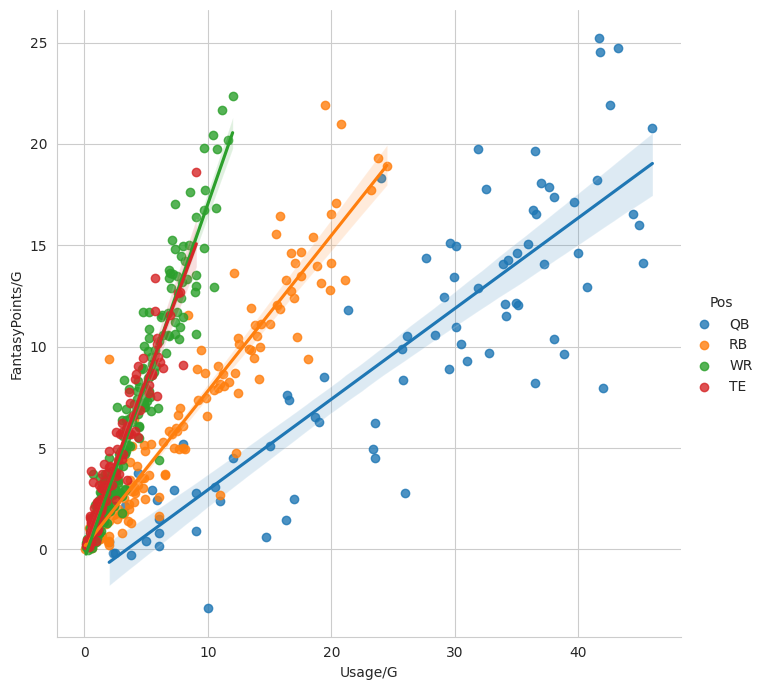

In [109]:
sns.lmplot(data=df_copy,x='Usage/G',y='FantasyPoints/G',hue='Pos',height=7);

In [110]:
combine_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202023.csv")

combine_df.head()

,Year,DraftTeam,DraftRound,DraftOverallPick`,PFRPlayerID,CFBPlayerID,Player,Pos,School,Height,Weight,40YD,BenchReps,Vertical,BroadJump,3Cone,Shuttle
0,2000,New York Jets,1.0,13.0,AbraJo00,NaN,John Abraham,OLB,South Carolina,4-Jun,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,2000,Seattle Seahawks,1.0,19.0,AlexSh00,shaun-alexander-1,Shaun Alexander,RB,Alabama,Jun-00,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,2000,Kansas City Chiefs,6.0,188.0,AlfoDa20,NaN,Darnell Alford,OT,Boston Col.,4-Jun,334.0,5.56,23.0,25.0,94.0,8.48,4.98
3,2000,NaN,NaN,NaN,NaN,NaN,Kyle Allamon,TE,Texas Tech,2-Jun,253.0,4.97,NaN,29.0,104.0,7.29,4.49
4,2000,Carolina Panthers,1.0,23.0,AndeRa21,NaN,Rashard Anderson,CB,Jackson State,2-Jun,206.0,4.55,NaN,34.0,123.0,7.18,4.15


In [111]:
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,175.0,5.232971,0.162464,4.83,5.1300,5.230,5.3350,5.84
CB,735.0,4.492830,0.093485,4.23,4.4300,4.490,4.5500,4.94
DB,55.0,4.531636,0.125812,4.31,4.4400,4.510,4.6150,4.85
DE,503.0,4.829066,0.141248,4.36,4.7400,4.830,4.9200,5.24
DL,104.0,4.976346,0.208014,4.52,4.8300,4.980,5.1400,5.46
DT,477.0,5.098700,0.164047,4.68,4.9800,5.080,5.2000,5.71
EDGE,50.0,4.690200,0.153057,4.36,4.5825,4.690,4.7900,5.08
FB,119.0,4.765966,0.138603,4.53,4.6650,4.740,4.8700,5.31
ILB,265.0,4.753774,0.121281,4.42,4.6600,4.750,4.8300,5.18


<Axes: xlabel='Pos', ylabel='40YD'>

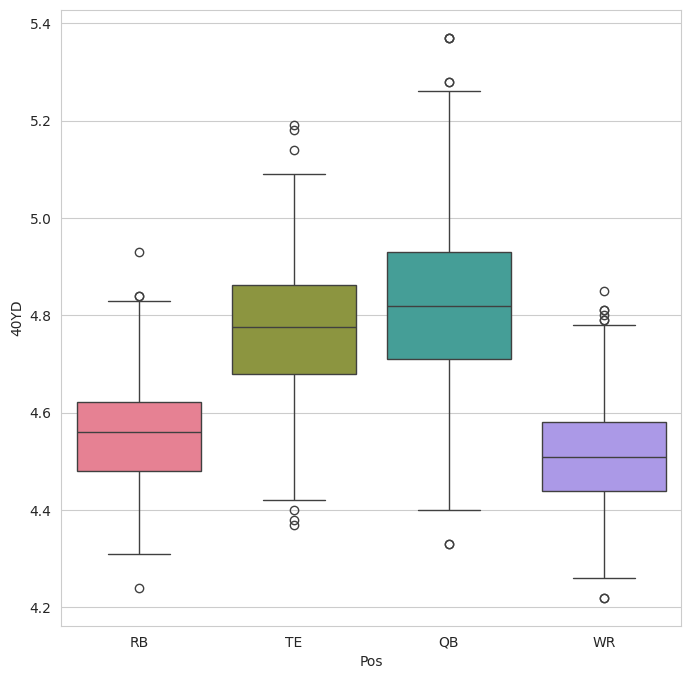

In [114]:
plt.figure(figsize=(8,8))

combine_df_skill_players=combine_df.loc[combine_df['Pos'].isin(['QB','RB','TE','WR'])]

sns.boxplot(x='Pos',y='40YD',data=combine_df_skill_players,palette=sns.color_palette('husl',n_colors=4))